<h1 style="background-color:Green;font-size:36pt;color:white">Aplicación de la ciencia de datos en ciencias médicas.  </h1>

## Giusseppe Benito Bervis Quintero
### León, Nicaragua - 2022

## Características del cuaderno
Este cuaderno está dedicado a la descarga, preprocesado y análisis estadístico de la prueba ELISA e información recolectada acerca de  IgG y IgM, vacunación contra la influenza, la tuberculosis y enfermedades previas, y grupo sanguineo que tienen los encuestados.

# Introducción
La principal dificultad al realizar análisis estadístico de conjuntos de datos reales es que estos, en muchos casos, no están preparados para poder aplicar sobre ellos métodos estadísticos que arrojen resultados útiles. Así, en este cuaderno se realizará un preprocesado de un conjunto de datos obtenidos de una investigación realizada sobre el COVID-19.

En este realizaremos cuatro etapas:
- Descarga de los datos.
- Preparación de los datos.
- Visualización de los datos.
- Análisis estadístico. 

# Descarga de los datos

In [50]:
# Importando los paquetes
import openpyxl
import pandas as pd
from datetime import datetime
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-health-care-basic-statistical-analysis/COVID_19.xlsx',
    'Sheet1', engine = 'openpyxl')
df

,Date time,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2020-09-20 11:23:15,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),0.9-1.1 (indefinable/невизначений),2.0,Yes,Yes,No,No,38.1,NaN,NaN,NaN
1,2020-09-20 11:23:15,23-40,Female (Жінка),"Ukraine, Chernivtsi",No,Yes,>1.1 (positive/позитивний),0.9-1.1 (indefinable/невизначений),2.0,No,Yes,No,No,37.0,NaN,NaN,NaN
2,2020-09-20 11:23:15,23-40,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,No,Yes,Yes,No,37.8,NaN,NaN,NaN
3,2020-09-20 11:23:15,40-65,Male (Чоловік),"Ukraine, Chernivtsi",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,No,Yes,No,No,NaN,NaN,NaN,NaN
4,2020-09-20 11:23:15,16-22,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Yes,>1.1 (positive/позитивний),<0.9 (negative/негативний),1.0,No,Yes,Yes,No,37.4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3381,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3382,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3383,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Podemos ver que el conjunto de datos tiene 3385 filas y 17 columnas.
También podemos observar la presencia de algunas filas en las que todas están rellenadas con NaN. (Habrá que eliminarlas).

## Eliminando filas llenas de NaN

In [16]:
# Eliminando las filas llenas de NaN
df.dropna(how='all', inplace = True)

De lo anterior se puede notar que en los datos hay 3308 filas, en realidad.

## Revisando los datos de las fechas
Al revisar las fechas se notó que hay algunos datos de fecha que contienen la siguiente información:

<center> año-mes-día hora:min:seg </center>


Respecto a esto se pudo observar, que hay datos en que los segundo traen muchos decimales. POr ejemplo:

<center> df.iloc(453, 0) = 2020-10-23 09:31:19.290000 </center>

Deberemos estandarizar estos formatos, quitando los decimales y convertirlos a \<< datetime \>> usando strptime().

Se volverán a cargar los datos, esta vez excluyendo las filas llenas de NaN, es decir tomaremos las primeras 3308 filas y aplicaremos los cambios en los formatos de fecha. Usaremos la columna de fechas como indice.  


In [14]:
def parse(x):
    y = str(x)
    return datetime.strptime(y[:19] , "%Y-%m-%d %H:%M:%S")

df = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-health-care-basic-statistical-analysis/COVID_19.xlsx',
    'Sheet1',
    na_values = "NaN",
    parse_dates = ['Date time'],
    index_col = 0,
    date_parser = parse,
    engine = 'openpyxl',
    nrows = 3308)

## Eliminando las columnas llenas de NaN
Como sabemos que hay algunas columnas que están llenas de NaN, las eliminaremos.

In [15]:
# Eliminando las columnas llenas de NaN
df.dropna(axis = 1, how='all', inplace = True)
df

,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
Date time,,,,,,,,,,,,,
2020-09-20 11:23:15,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),0.9-1.1 (indefinable/невизначений),2.0,Yes,Yes,No,No,38.1
2020-09-20 11:23:15,23-40,Female (Жінка),"Ukraine, Chernivtsi",No,Yes,>1.1 (positive/позитивний),0.9-1.1 (indefinable/невизначений),2.0,No,Yes,No,No,37.0
2020-09-20 11:23:15,23-40,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,No,Yes,Yes,No,37.8
2020-09-20 11:23:15,40-65,Male (Чоловік),"Ukraine, Chernivtsi",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,No,Yes,No,No,NaN
2020-09-20 11:23:15,16-22,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Yes,>1.1 (positive/позитивний),<0.9 (negative/негативний),1.0,No,Yes,Yes,No,37.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02 09:56:35,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,2.0,Yes,Yes,Maybe (можливо),No,37.3
2021-03-02 10:10:18,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,2.0,Yes,Yes,Maybe (можливо),No,37.4
2021-03-04 11:03:43,40-65,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,1.0,No,Yes,Maybe (можливо),No,37.7


## Preparación de los datos


### Observando los tipos de datos
Antes de manipular los datos, es bueno observar el tipo de datos con los que contamos y verificar si hay datos faltantes en alguna de las variables que puede ser decisiva para realizar algún análisis posterior. 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3308 entries, 2020-09-20 11:23:15 to 2021-04-05 03:18:16
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    3303 non-null   object 
 1   Gender                                 3297 non-null   object 
 2   Region                                 3286 non-null   object 
 3   Do you smoke?                          3269 non-null   object 
 4   Have you had Covid`19 this year?       3305 non-null   object 
 5   IgM level                              3232 non-null   object 
 6   IgG level                              3248 non-null   object 
 7   Blood group                            3252 non-null   float64
 8   Do you vaccinated influenza?           3294 non-null   object 
 9   Do you vaccinated tuberculosis?        3303 non-null   object 
 10  Have you had influenza this year?   

### Manipulando la columna 'Gender'
Después de la inspección se determinó que existen valores faltantes en todas las columnas, sin embargo pongamos atención en el género ya que debería haber 3308, pero solo hay 3297. Esta variable podría ser decisiva para hacer un análisis más profundo, eliminaremos las filas que no tengan indicado el género.

In [17]:
df.dropna(subset = ['Gender'], inplace = True) # Inplace modifica el df original
df.shape

(3297, 13)

### Eliminando los datos en cirílico
Algo que salta a la vista es que hay datos que contienen caracteres en cirílico, eliminemos esos datos.

Veamos que los cirílicos están encerrados en dos formatos. Uno, entre paréntesis, y después de '/'. Debemos tomar en cuenta esto para eliminarlos.

Las columnas que no tienen cirílicos son: 3, 7, 12

In [19]:
# Quitando los cirilicos de las columnas [1, 2, 4, 8, 9, 10, 11]
# Los cirílicos, están entre paréntesis
for c in df.columns[[1, 2, 4, 8, 9, 10, 11]]:
    df.loc[:, c] = df[c].apply(lambda x : x if str(x).find('(') == -1 else (str(x)[:x.find('(')])).astype('category')

# Quitando los cirilicos de las columnas [5, 6]
# Los cirílicos, están antes de una '/'. Le agregamos ')' al final, para cerrar los paréntesis.
for c in df.columns[[5, 6]]:
    df.loc[:, c] = df[c].apply(lambda x : x if str(x).find('/') == -1 else (str(x)[:x.find('/')] + ')')).astype('category')

In [22]:
df

,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
Date time,,,,,,,,,,,,,
2020-09-20 11:23:15,40-65,Female,"Ukraine, Lviv",No,Maybe,<0.9 (negative),0.9-1.1 (indefinable),2.0,Yes,Yes,No,No,38.1
2020-09-20 11:23:15,23-40,Female,"Ukraine, Chernivtsi",No,Yes,>1.1 (positive),0.9-1.1 (indefinable),2.0,No,Yes,No,No,37.0
2020-09-20 11:23:15,23-40,Female,"Ukraine, Lviv",No,Maybe,<0.9 (negative),<0.9 (negative),2.0,No,Yes,Yes,No,37.8
2020-09-20 11:23:15,40-65,Male,"Ukraine, Chernivtsi",No,No,<0.9 (negative),<0.9 (negative),2.0,No,Yes,No,No,NaN
2020-09-20 11:23:15,16-22,Male,"Ukraine, Lviv",No,Yes,>1.1 (positive),<0.9 (negative),1.0,No,Yes,Yes,No,37.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02 09:56:35,40-65,Female,"Ukraine, Lviv",No,Maybe,NaN,NaN,2.0,Yes,Yes,Maybe,No,37.3
2021-03-02 10:10:18,40-65,Female,"Ukraine, Lviv",No,Maybe,NaN,NaN,2.0,Yes,Yes,Maybe,No,37.4
2021-03-04 11:03:43,40-65,Male,"Ukraine, Lviv",No,Maybe,NaN,NaN,1.0,No,Yes,Maybe,No,37.7


Puede observarse que ya no hay caracteres cirílicos.

### Manipulando datos booleanos
Una característica a notar, es que hay preguntas cerradas cuya respuesta solo puede ser "sí" o "no". Estos datos podemos convertirlos a booleanos, para su posible mejor manejo en un futuro.

Las columnas que solo tienen datos de este son: 3, 4, 8, 9, 10, 11

In [23]:
# Convirtiendo los valores Yes y No en booleanos.
# Dejamos igual los "Maybe"
for c in df.columns[[3, 4, 8, 9, 10, 11]]:
    df.loc[:, c] = df[c].map({'No' : False, 'Yes' : True, 'Maybe ' : 'Maybe'}, na_action = 'ignore')
df

,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
Date time,,,,,,,,,,,,,
2020-09-20 11:23:15,40-65,Female,"Ukraine, Lviv",False,Maybe,<0.9 (negative),0.9-1.1 (indefinable),2.0,True,True,False,False,38.1
2020-09-20 11:23:15,23-40,Female,"Ukraine, Chernivtsi",False,True,>1.1 (positive),0.9-1.1 (indefinable),2.0,False,True,False,False,37.0
2020-09-20 11:23:15,23-40,Female,"Ukraine, Lviv",False,Maybe,<0.9 (negative),<0.9 (negative),2.0,False,True,True,False,37.8
2020-09-20 11:23:15,40-65,Male,"Ukraine, Chernivtsi",False,False,<0.9 (negative),<0.9 (negative),2.0,False,True,False,False,NaN
2020-09-20 11:23:15,16-22,Male,"Ukraine, Lviv",False,True,>1.1 (positive),<0.9 (negative),1.0,False,True,True,False,37.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02 09:56:35,40-65,Female,"Ukraine, Lviv",False,Maybe,NaN,NaN,2.0,True,True,Maybe,False,37.3
2021-03-02 10:10:18,40-65,Female,"Ukraine, Lviv",False,Maybe,NaN,NaN,2.0,True,True,Maybe,False,37.4
2021-03-04 11:03:43,40-65,Male,"Ukraine, Lviv",False,Maybe,NaN,NaN,1.0,False,True,Maybe,False,37.7


Podemos observar que de 3308 filas, nos quedamos con 3297 filas, que tienen lleno el campo 'Gender'. Podemos ver que esta, ahora, es la columna que no tienen ningún dato faltante.

### Manipulando la columna 'Age'
De la tabla podemos ver que la edad corresponde a rangos, por lo que esta variable debe ser categorizada.

In [25]:
df['Age'] = df['Age'].astype('category')
df['Age'] 

Date time
2020-09-20 11:23:15    40-65
2020-09-20 11:23:15    23-40
2020-09-20 11:23:15    23-40
2020-09-20 11:23:15    40-65
2020-09-20 11:23:15    16-22
                       ...  
2021-03-02 09:56:35    40-65
2021-03-02 10:10:18    40-65
2021-03-04 11:03:43    40-65
2021-03-04 11:04:30    40-65
2021-04-05 03:18:16    16-22
Name: Age, Length: 3297, dtype: category
Categories (5, object): ['0-15', '16-22', '23-40', '40-65', '>65']

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3297 entries, 2020-09-20 11:23:15 to 2021-04-05 03:18:16
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Age                                    3296 non-null   category
 1   Gender                                 3297 non-null   category
 2   Region                                 3279 non-null   category
 3   Do you smoke?                          3267 non-null   object  
 4   Have you had Covid`19 this year?       3293 non-null   object  
 5   IgM level                              3221 non-null   category
 6   IgG level                              3237 non-null   category
 7   Blood group                            3243 non-null   float64 
 8   Do you vaccinated influenza?           3283 non-null   object  
 9   Do you vaccinated tuberculosis?        3291 non-null   object  
 10  Have you had influenza t

# Visualización de datos

### Gráfica de barras
Visualizando el el número de hombres y mujeres encuestados, respecto a los grupos etarios.

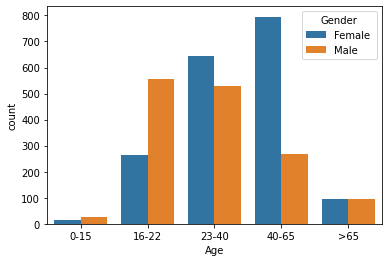

In [87]:
sns.countplot(x = 'Age', hue = 'Gender', data = df)
plt.show()

Podemos ver que la mayoría de personas encuestadas son mujeres, en el rango 40-65. Le siguen, igual, mujeres, en el rango 23-40.

# Histograma de las temperaturas


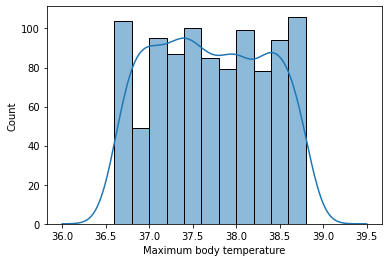

In [219]:
df_t = df[df['Have you had Covid`19 this year?'] == True].dropna(subset=['Maximum body temperature'])
sns.histplot(df_t['Maximum body temperature'], kde = True, kde_kws = {'clip':(39.5, 36)})
plt.show()

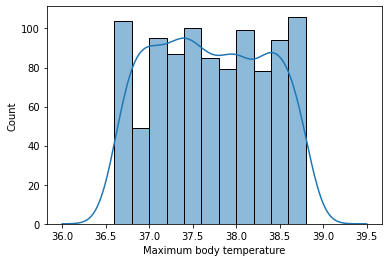

In [218]:
df_t = df[df['Have you had Covid`19 this year?'] == True].dropna(subset=['Maximum body temperature'])
sns.histplot(df_t['Maximum body temperature'], kde = True, kde_kws = {'clip':(39.5, 36)})
plt.show()

In [233]:
df[df['Have you had Covid`19 this year?'] == False].dropna(subset=['Maximum body temperature']).count()

Age                                      0
Gender                                   0
Region                                   0
Do you smoke?                            0
Have you had Covid`19 this year?         0
IgM level                                0
IgG level                                0
Blood group                              0
Do you vaccinated influenza?             0
Do you vaccinated tuberculosis?          0
Have you had influenza this year?        0
Have you had tuberculosis this year?     0
Maximum body temperature                 0
dtype: int64

### Diagrama de cajas
Contraponiendo La temperatura máxima respecto a la edad. 

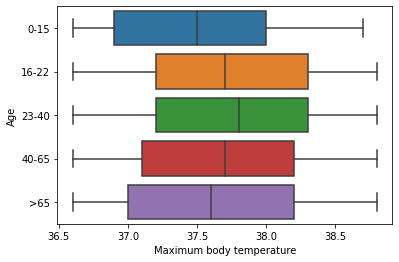

In [95]:
sns.boxplot(y = df["Age"], x=df["Maximum body temperature"])
plt.show()

# Conclusiones

Algo de notar, a partir de las gráficas anteriores, es que no se pueden inferir conclusiones, respecto a la temperatura. Ya que, tanto los que tuvieron COVID como los que no sabían, tienen rangos de valores bastante dispersos. Así que el análisis estadístico lo descartamos.

Otro elemento a notar es que de los que no tuvieron COVID no hay registros de sus temperaturas, todos son NaN.